In [1]:
import librosa
import numpy as np
from constants import *
from scipy import signal
from scipy.signal import correlate
import matplotlib.pyplot as plt

In [2]:
gtr, _ = librosa.load("dataset/gtr_1/Gtr_1_13.wav", mono=True, sr=SR)
ney, _ = librosa.load("dataset/ney_1/Ney_1_13.wav", mono=True, sr=SR)
print(gtr.shape, ney.shape)

(96000,) (96000,)


In [3]:
ney_sub = ney[24000:40000]
gtr_sub = gtr[24000:40000]
correlation = signal.correlate(ney_sub, gtr_sub, mode="full")
lags = signal.correlation_lags(ney_sub.size, ney_sub.size, mode="full")
lag = lags[np.argmax(correlation)]
print(lag)

-3754


In [4]:
max_corr_idx = np.argsort(-correlation)
print(max_corr_idx[:5])

[12245 12490 12368 12123 12000]


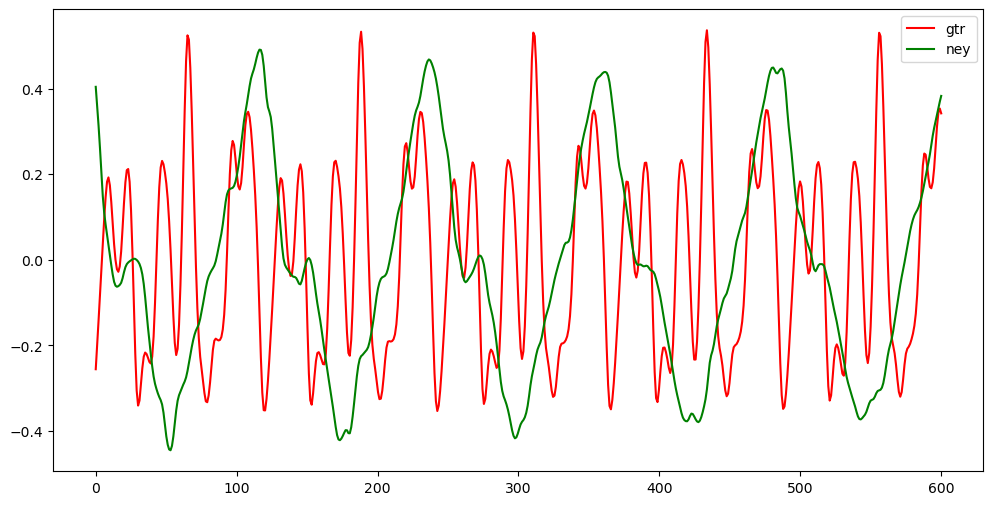

In [6]:
num_samples = 600
y = np.linspace(0, num_samples, num_samples)
gtr_shift = 24000
ney_shift = gtr_shift + lag
plt.figure(figsize=(12, 6))
plt.plot(y, gtr[gtr_shift:gtr_shift+num_samples], color="r", label="gtr")
plt.plot(y, ney[ney_shift:ney_shift+num_samples], color="g", label="ney")
plt.legend()
plt.show()